In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

#### Step 2: Define the EpsilonGreedyRecommender class

 - The `__init__` method initializes the recommender with the following:
   - `items`: A list of items that can be recommended.
   - `epsilon`: A parameter that controls the exploration probability.
   - `counts`: A dictionary that keeps track of how many times each item has been recommended.
   - `rewards`: A dictionary that stores the total rewards received for each item.
 - This setup allows the model to keep track of which items are being recommended and how well they are performing.

In [2]:
class EpsilonGreedyRecommender:
    def __init__(self, items, epsilon=0.1):
        self.items   = items    # List of items to recommend
        self.epsilon = epsilon  # Exploration probability
        self.counts  = {item: 0 for item in items}  # Count of times each item has been recommended
        self.rewards = {item: 0 for item in items}  # Sum of rewards for each item

#### Step 3: Implement the recommendation logic

- `recommend` method:
   - This method decides which item to recommend based on the epsilon-greedy strategy.
   - **Exploration:** With a probability of `epsilon`, it selects a random item from the list to explore new options.
   - **Exploitation:** With a probability of `1 - epsilon`, it selects the item with the highest average reward.
   - To calculate the average reward for each item, it divides the total rewards by the count of recommendations.
   - If an item has never been recommended (`count == 0`), it assigns an average reward of `0`.

In [3]:
class EpsilonGreedyRecommender:
    def __init__(self, items, epsilon=0.1):
        self.items = items  # List of items to recommend
        self.epsilon = epsilon  # Exploration probability
        self.counts = {item: 0 for item in items}  # Count of times each item has been recommended
        self.rewards = {item: 0 for item in items}  # Sum of rewards for each item

    def recommend(self):
        # Explore: Choose a random item with probability epsilon
        if random.uniform(0, 1) < self.epsilon:
            recommended_item = random.choice(self.items)
        else:
            # Exploit: Choose the item with the highest average reward
            average_rewards = {item: (self.rewards[item] / self.counts[item]) if self.counts[item] > 0 else 0 for item in self.items}
            recommended_item = max(average_rewards, key=average_rewards.get)

        return recommended_item

#### Step 4: Update the model based on user feedback

- `update` method:
   - This method updates the internal state of the recommender model after an item is recommended and user feedback is received.
   - It increments the count for the recommended item.
   - It adds the received reward to the total reward for that item.
- This step is crucial for the model to learn over time which items are preferred based on user interactions.

In [4]:
class EpsilonGreedyRecommender:
    def __init__(self, items, epsilon=0.1):
        self.items = items  # List of items to recommend
        self.epsilon = epsilon  # Exploration probability
        self.counts = {item: 0 for item in items}  # Count of times each item has been recommended
        self.rewards = {item: 0 for item in items}  # Sum of rewards for each item

    def recommend(self):
        # Explore: Choose a random item with probability epsilon
        if random.uniform(0, 1) < self.epsilon:
            recommended_item = random.choice(self.items)
        else:
            # Exploit: Choose the item with the highest average reward
            average_rewards = {item: (self.rewards[item] / self.counts[item]) if self.counts[item] > 0 else 0 for item in self.items}
            recommended_item = max(average_rewards, key=average_rewards.get)

        return recommended_item

    def update(self, item, reward):
        # Update the counts and rewards for the item
        self.counts[item] += 1
        self.rewards[item] += reward

In [5]:
# Step 5: Example usage of the EpsilonGreedyRecommender
# Define the list of items to recommend
items = ['Item A', 'Item B', 'Item C']

In [6]:
# Lists to store data for visualization
rewards_history = {item: [] for item in items}
counts_history  = {item: [] for item in items}

In [7]:
# Create an instance of the EpsilonGreedyRecommender
recommender = EpsilonGreedyRecommender(items, epsilon=0.1)

#### Reward Simulation

- simulate the user's response to the recommended item, representing a reward signal that the model uses to learn and adjust future recommendations. 
- It uses the `numpy.random.choice` function to randomly select either 0 (dislike) or 1 (like) based on specified probabilities. Here's a detailed breakdown:

#### Explanation
- **`np.random.choice([0, 1], p=[0.7, 0.3])`**:
  - This function randomly selects either 0 or 1.
  - The parameter `p=[0.7, 0.3]` specifies the probabilities of selecting 0 and 1, respectively.
    - `0.7` probability for choosing `0` (dislike).
    - `0.3` probability for choosing `1` (like).
  - This means that if the recommended item is `'Item A'`, there is a 70% chance that the user will "dislike" it (`reward = 0`) and a 30% chance that the user will "like" it (`reward = 1`).
  
- **`if recommended_item == 'Item A'`**:
  - This condition checks if the item recommended by the model is `'Item A'`.
  
- **`else np.random.choice([0, 1], p=[0.5, 0.5])`**:
  - If the recommended item is not `'Item A'`, it uses a different probability distribution for the user's response.
  - Here, `p=[0.5, 0.5]` means that there is an equal 50% chance of the user either "liking" or "disliking" the item (`0` or `1`).

#### Purpose
This conditional logic introduces variability in user behavior:
- **For `'Item A'`**: Users are less likely to like the item (30% chance of a like). This simulates a scenario where `'Item A'` might not be as popular or relevant.
- **For Other Items**: Users are equally likely to like or dislike them (50% chance). This represents items with neutral or balanced appeal.

#### Why This is Important
- **Simulating Realistic User Behavior**: In real-world recommendation systems, not every item is equally liked by users. This variability helps in simulating more realistic user behavior, which is crucial for testing and improving the model.
- **Model Learning**: The rewards serve as feedback for the model to learn which items are more likely to be liked, influencing future recommendations. This is central to the Multi-Armed Bandit (MAB) approach, where the model tries to balance exploration (testing new or less-known items) with exploitation (recommending items known to be liked).


In [8]:
# Simulate recommendations and user feedback
for _ in range(10000):
    recommended_item = recommender.recommend()

    # Simulate a reward (1 for like, 0 for dislike)
    reward = np.random.choice([0, 1], p=[0.7, 0.3]) if recommended_item == 'Item A' else np.random.choice([0, 1], p=[0.5, 0.5])
    recommender.update(recommended_item, reward)

    # Record history for visualization
    for item in items:
        rewards_history[item].append(recommender.rewards[item] / recommender.counts[item] if recommender.counts[item] > 0 else 0)
        counts_history[item].append(recommender.counts[item])

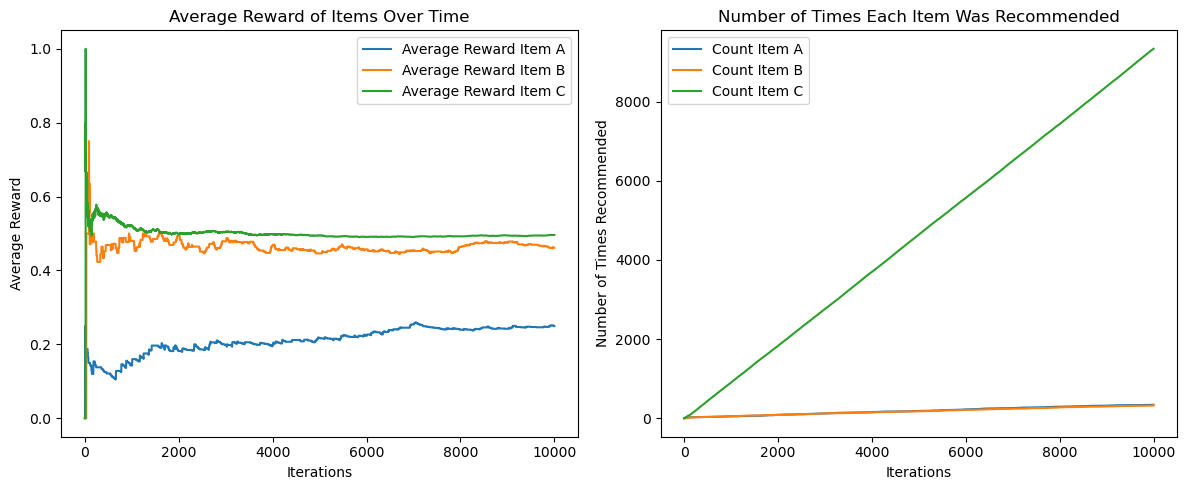

In [9]:
# Plotting the average reward over time for each item
plt.figure(figsize=(12, 5))

# Average Reward Plot
plt.subplot(1, 2, 1)
for item in items:
    plt.plot(rewards_history[item], label=f'Average Reward {item}')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Average Reward of Items Over Time')
plt.legend()

# Counts Plot
plt.subplot(1, 2, 2)
for item in items:
    plt.plot(counts_history[item], label=f'Count {item}')
plt.xlabel('Iterations')
plt.ylabel('Number of Times Recommended')
plt.title('Number of Times Each Item Was Recommended')
plt.legend()

plt.tight_layout()
plt.show()
